# Laboratorio 4 - Deep Learning
### Priscilla González y Estefanía Elvira

Epoch 1/20
329/329 [==============================] - 1s 1ms/step - loss: 0.4806 - accuracy: 0.8069 - val_loss: 0.4524 - val_accuracy: 0.8122
Epoch 2/20
329/329 [==============================] - 0s 884us/step - loss: 0.4506 - accuracy: 0.8168 - val_loss: 0.4462 - val_accuracy: 0.8149
Epoch 3/20
329/329 [==============================] - 0s 846us/step - loss: 0.4440 - accuracy: 0.8185 - val_loss: 0.4434 - val_accuracy: 0.8153
Epoch 4/20
329/329 [==============================] - 0s 851us/step - loss: 0.4383 - accuracy: 0.8185 - val_loss: 0.4467 - val_accuracy: 0.8127
Epoch 5/20
329/329 [==============================] - 0s 973us/step - loss: 0.4364 - accuracy: 0.8212 - val_loss: 0.4466 - val_accuracy: 0.8142
Epoch 6/20
329/329 [==============================] - 0s 883us/step - loss: 0.4330 - accuracy: 0.8215 - val_loss: 0.4430 - val_accuracy: 0.8124
Epoch 7/20
329/329 [==============================] - 0s 884us/step - loss: 0.4332 - accuracy: 0.8181 - val_loss: 0.4439 - val_accuracy: 0

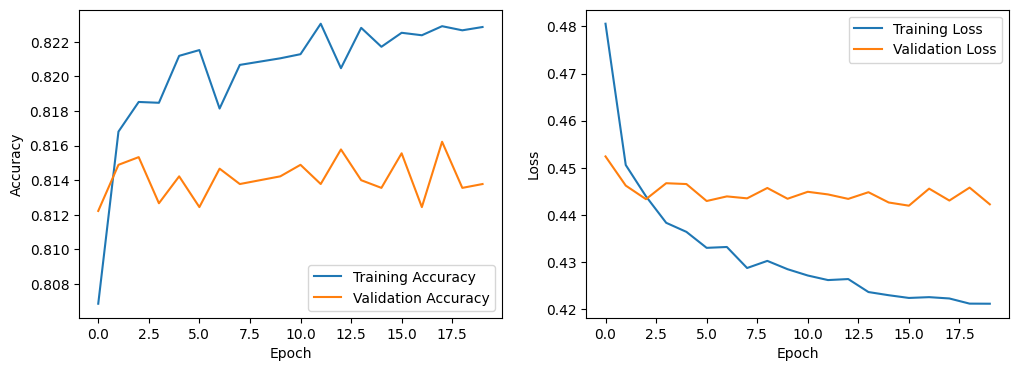

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Cargar los datos (asegúrate de que 'data.xlsx' sea el nombre correcto del archivo)
data = pd.read_excel('Lab4.xlsx', skiprows=1)

# Preprocesamiento de datos
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']

# Normalizar las características numéricas
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definir la arquitectura de la red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on test data: {test_accuracy * 100:.2f}%')

# Visualizar la precisión y la pérdida a lo largo del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()